<a href="https://colab.research.google.com/github/Stesilva16/Projeto-Final---Clima-/blob/main/Tratamento_Equipe_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final - Clima ⛅

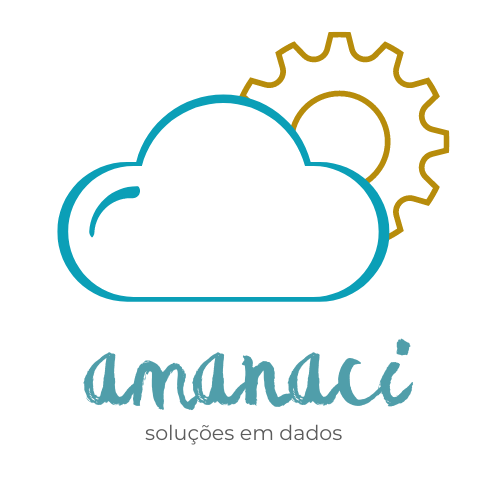




## Descritivo do Projeto 📝

Esse é o projeto final do bootcamp de Engenharia de Dados da Soulcode Academy. Nele colocamos em prática os conhecimentos adquiridos durante o curso. 

O projeto consiste em escolher datasets sobre o tema pré-determinado, extrai-los das fontes originais, carrega-los em ambientes da Google Cloud Platform, tratar os dados com o uso de bibliotecas python e carregar esses dados tratados novamente para ambientes da Google Cloud Platform. Com esses dados tratados realizaremos análises relevantes acerca do tema.

Ao nosso grupo foi designado o tema Clima e é composto por 5 pessoas: Daniel Campos, Fernanda Martins, Lucas Sobral, Mayara Dantas  e Stefany Gracy.

No planejamento inicial definimos as etapas a serem cumpridas, a distribuição de tarefas necessárias para o cumprimento de cada etapa e o tempo estimado para cada tarefa. Todas etapas estão detalhadas nesta [página.](https://lucasbral.notion.site/Descritivo-Projeto-Final-Equipe-3-d74b512ca5404ec8b536f23ad8e1b28c)

Abaixo encontra-se um fluxograma com as ferramentas utilizadas no projeto:

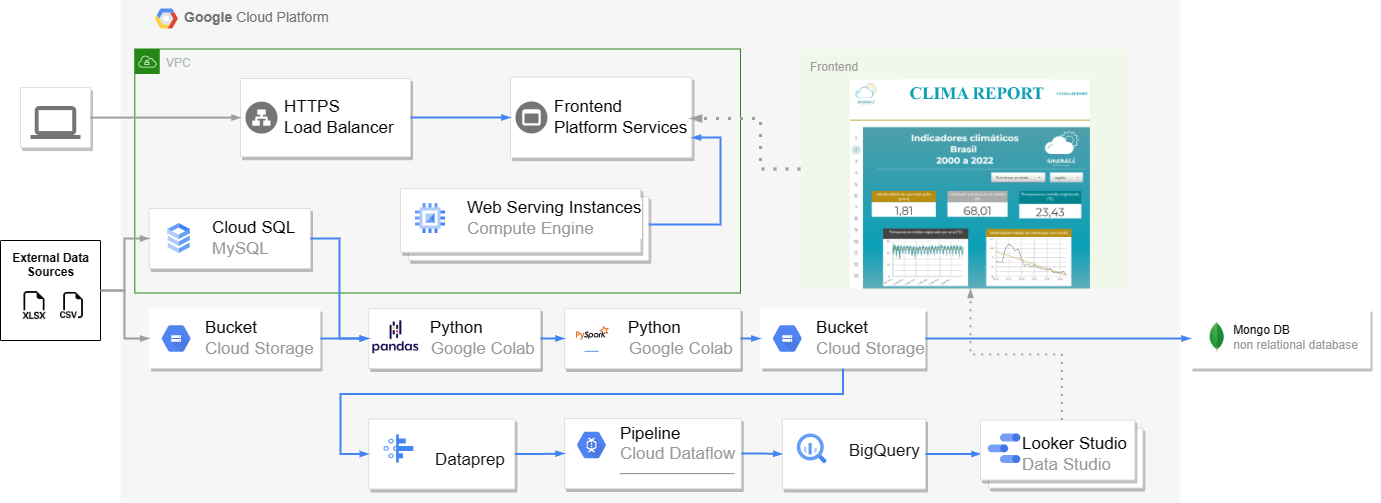

## Instalações e Importação das Bibliotecas 📚

In [ ]:
!pip install gcsfs
!pip install pyspark
import sys
!{sys.executable} -m pip install cloud-sql-python-connector["pymysql"] SQLAlchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 21.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=21dc7ce86e584eb83bd7979aaae1de0af2ec86c5bd57c28e6df870575aaf495c
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 128.0 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from google.cloud import storage
import os
import pyspark.sql.functions as F
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import sys
import sqlalchemy
from google.cloud.sql.connector import Connector, IPTypes

## Configuração do Ambiente da GCP ☁

In [ ]:
serviceAccount = '/content/projeto-final-ed7-3e8bedf4ed71.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount
client = storage.Client()
bucket = client.get_bucket('equipe3-storage')

### 🔵Acesso ao Cloud Storage 

#### 🔺Dataset 1 - Clima

In [ ]:
bucket.blob('equipe3-storage/Datasets_Ntratados/dataset1_clima/stations.csv')
path_est = 'gs://equipe3-storage/Datasets_Ntratados/dataset1_clima/stations.csv'

bucket.blob('equipe3-storage/Datasets_Ntratados/dataset1_clima/clima.csv')
path_cli = 'gs://equipe3-storage/Datasets_Ntratados/dataset1_clima/clima.csv'

In [ ]:
df_clima_estacoes = pd.read_csv(path_est,sep=',')
df_clima = pd.read_csv(path_cli,sep=',')

#### 🔺Dataset 2 - Emissão de CO2

In [ ]:
bucket.blob('emissao_co2.xlsx')
path_co2 = 'gs://equipe3-storage/Datasets_Ntratados/dataset2_emissao_co2/emissao_co2.xlsx'

In [ ]:
df_co2 = pd.read_excel(path_co2)

#### 🔺Dataset 3 - Queimadas

In [ ]:
bucket.blob('historico_estado_acre.csv')
path1 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_acre.csv'

bucket.blob('historico_estado_amapa.csv')
path2 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_amapa.csv'

bucket.blob('historico_estado_amazonas.csv')
path3 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_amazonas.csv'

bucket.blob('historico_estado_bahia.csv')
path4 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_bahia.csv'

bucket.blob('historico_estado_ceara.csv')
path5 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_ceara.csv'

bucket.blob('historico_estado_distrito_federal.csv')
path6 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_distrito_federal.csv'

bucket.blob('historico_estado_espirito_santo.csv')
path7 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_espirito_santo.csv'

bucket.blob('historico_estado_goias.csv')
path8 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_goias.csv'

bucket.blob('historico_estado_maranhao.csv')
path9 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_maranhao.csv'

bucket.blob('historico_estado_mato_grosso.csv')
path10 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_mato_grosso.csv'

bucket.blob('historico_estado_mato_grosso_do_sul.csv')
path11 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_mato_grosso_do_sul.csv'

bucket.blob('historico_estado_minas_gerais.csv')
path12 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_minas_gerais.csv'

bucket.blob('historico_estado_para.csv')
path13 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_para.csv'

bucket.blob('historico_estado_paraiba.csv')
path14 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_paraiba.csv'

bucket.blob('historico_estado_parana.csv')
path15 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_parana.csv'

bucket.blob('historico_estado_pernambuco.csv')
path16 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_pernambuco.csv'

bucket.blob('historico_estado_piaui.csv')
path17 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_piaui.csv'

bucket.blob('historico_estado_rio_de_janeiro.csv')
path18 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_rio_de_janeiro.csv'

bucket.blob('historico_estado_rio_grande_do_norte.csv')
path19 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_rio_grande_do_norte.csv'

bucket.blob('historico_estado_rio_grande_do_sul.csv')
path20 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_rio_grande_do_sul.csv'

bucket.blob('historico_estado_rondonia.csv')
path21 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_rondonia.csv'

bucket.blob('historico_estado_roraima.csv')
path22 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_roraima.csv'

bucket.blob('historico_estado_santa_catarina.csv')
path23 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_santa_catarina.csv'

bucket.blob('historico_estado_sao_paulo.csv')
path24 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_sao_paulo.csv'

bucket.blob('historico_estado_sergipe.csv')
path25 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_sergipe.csv'

bucket.blob('historico_estado_tocantins.csv')
path26 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_tocantins.csv'

bucket.blob('historico_estado_alagoas.csv')
path27 = 'gs://equipe3-storage/Datasets_Ntratados/dataset8_queimadas_estados/historico_estado_alagoas.csv'

In [ ]:
ac = pd.read_csv(path1)
ap = pd.read_csv(path2)
am = pd.read_csv(path3)
al = pd.read_csv(path27)
ba = pd.read_csv(path4)
ce = pd.read_csv(path5)
df = pd.read_csv(path6)
es = pd.read_csv(path7)
go = pd.read_csv(path8)
ma = pd.read_csv(path9)
mt = pd.read_csv(path10)
ms = pd.read_csv(path11)
mg = pd.read_csv(path12)
pa = pd.read_csv(path13)
pb = pd.read_csv(path14)
pr = pd.read_csv(path15)
pe = pd.read_csv(path16)
pi = pd.read_csv(path17)
rj = pd.read_csv(path18)
rn = pd.read_csv(path19)
rs = pd.read_csv(path20)
ro = pd.read_csv(path21)
rr = pd.read_csv(path22)
sc = pd.read_csv(path23)
sp = pd.read_csv(path24)
se = pd.read_csv(path25)
to = pd.read_csv(path26)

#### 🔺Dataset 4 - Produção Agrária

In [ ]:
bucket.blob('cafe.csv')
path_caf = 'gs://equipe3-storage/Datasets_Ntratados/dataset4_producao_agraria/cafe.csv'

bucket.blob('cana.csv')
path_can = 'gs://equipe3-storage/Datasets_Ntratados/dataset4_producao_agraria/cana.csv'

bucket.blob('milho.csv')
path_mil = 'gs://equipe3-storage/Datasets_Ntratados/dataset4_producao_agraria/milho.csv'

bucket.blob('soja.csv')
path_soj = 'gs://equipe3-storage/Datasets_Ntratados/dataset4_producao_agraria/soja.csv'

In [ ]:
df_cafe = pd.read_csv(path_caf, sep=';', skiprows = 3)
df_cafe = df_cafe.drop([0], axis = 0)
df_cafe = df_cafe.drop(df_cafe.index[28:], axis = 0)


df_cana = pd.read_csv(path_can, sep=';', skiprows = 3)
df_cana = df_cana.drop([0], axis = 0)
df_cana = df_cana.drop(df_cana.index[28:], axis = 0)

df_milho = pd.read_csv(path_mil, sep=';', skiprows = 3)
df_milho = df_milho.drop([0], axis = 0)
df_milho = df_milho.drop(df_milho.index[28:], axis = 0)

df_soja = pd.read_csv(path_soj, sep=';', skiprows = 3)
df_soja = df_soja.drop([0], axis = 0)
df_soja = df_soja.drop(df_soja.index[28:], axis = 0)

#### 🔺Dataset 5 - Ocorrência de desastres naturais

In [ ]:
bucket.blob('Datasets_Ntratados/dataset6_desastres_naturais/desastres_geral.xlsx')
path_des = 'gs://equipe3-storage/Datasets_Ntratados/dataset6_desastres_naturais/desastres_geral.xlsx'

In [ ]:
df_des = pd.read_excel(path_des)

#### 🔺Dataset 6 - Impacto econômico de desastres naturais

In [ ]:
bucket.blob('/Datasets_Ntratados/dataset6_desastres_naturais/desastres_custos.xlsx')
path_custo = 'gs://equipe3-storage/Datasets_Ntratados/dataset6_desastres_naturais/desastres_custos.xlsx'

In [ ]:
df_custo = pd.read_excel(path_custo)

## Envio dos Df's não tratados para o MySQL 📂

### 🔵Credencias de Acesso ao MySQL

In [ ]:
hostname="34.168.30.10"
dbname="projeto_final"
uname="root"
pwd="senha"

### 🔵Utilizando o engine para conectar ao MySQL

In [ ]:
INSTANCE_CONNECTION_NAME = f"projeto-final-ed7:us-west1:equipe3" 
print(f"Your instance connection name is: {INSTANCE_CONNECTION_NAME}")
DB_USER = "root"
DB_PASS = "senha"
DB_NAME = "projeto_final"
# iniciando variável de conexão
connector = Connector()

# Gerando função de retorno da conexão
def getconn():
    conn = connector.connect(
        INSTANCE_CONNECTION_NAME,
        "pymysql",
        user=DB_USER,
        password=DB_PASS,
        db=DB_NAME
    )
    return conn

### 🔵Envio dos datasets

#### 🔺Dataset 1 - Clima

In [ ]:
pool = sqlalchemy.create_engine(
    "mysql+pymysql://",
    creator=getconn,
)
df_clima_estacoes.to_sql('clima_estacoes',pool)

In [ ]:
pool = sqlalchemy.create_engine(
    "mysql+pymysql://",
    creator=getconn,
)
df_clima.to_sql('clima',pool)

#### 🔺Dataset 2 - Emissão de CO2

In [ ]:
pool = sqlalchemy.create_engine(
    "mysql+pymysql://",
    creator=getconn,
)
df_co2.to_sql('emissao_co2',pool)

#### 🔺Dataset 3 - Queimadas

In [ ]:
df_queimadas = pd.concat([ac,ap,am,al,ba,ce,df,es,go,ma,mt,ms,mg,pa,pb,pr,pe,pi,rj,rn,rs,ro,rr,sc,sp,se,to],ignore_index = True)
df_queimadas.to_sql('queimadas', engine, index=True)

#### 🔺Dataset 4 - Produção Agrária

In [ ]:
# Dropando as linhas que não possuem dados relevantes para a análise
df_cafe = df_cafe.drop([0], axis = 0)
df_cafe = df_cafe.drop(df_cafe.index[28:], axis = 0)

df_cana = df_cana.drop([0], axis = 0)
df_cana = df_cana.drop(df_cana.index[28:], axis = 0)

df_milho = df_milho.drop([0], axis = 0)
df_milho = df_milho.drop(df_milho.index[28:], axis = 0)

df_soja = df_soja.drop([0], axis = 0)
df_soja = df_soja.drop(df_soja.index[28:], axis = 0)

In [ ]:
df_cafe.to_sql('prod_cafe', engine, index=True)
df_cana.to_sql('prod_cana', engine, index=True)
df_milho.to_sql('prod_milho', engine, index=True)
df_soja.to_sql('prod_soja', engine, index=True)

#### 🔺Dataset 5 - Ocorrências de desastres naturais

In [ ]:
df_des.to_sql('desastres_naturais',pool)

#### 🔺Dataset 6 - Impacto econômico de desastres naturais

## Tratamento dos datasets 🪛

### 🔵Dataset 1 - Dados de Clima 

#### 🔺1 - Configuração parâmetros do Pandas

In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.precision', 2)
pd.set_option('float_format', '{:.3f}'.format)

#### 🔺2 - Pré-Análise

##### 🔺2.1 - Visualização do dataset de estações climáticas

In [ ]:
df_clima_estacoes

,region,state,city_station,id_station,lat,lon,lvl,record_first,record_last
0,CO,DF,BRASILIA,A001,"-15,78944444","-47,92583332","1159,54",2000-05-07,2022-10-31
1,NE,BA,SALVADOR,A401,"-13,01666666","-38,51666666","51,41",2000-05-13,2022-10-31
2,N,AM,MANAUS,A101,"-3,10333333","-60,01638888","61,25",2000-05-09,2022-10-31
3,SE,RJ,ECOLOGIA AGRICOLA,A601,"-22,8","-43,68333333",33,2000-05-07,2022-10-31
4,S,RS,PORTO ALEGRE,A801,"-30,05","-51,16666666","46,97",2000-09-22,2022-10-31
...,...,...,...,...,...,...,...,...,...
608,S,SC,CAMPOS NOVOS,A898,"-27,3886111","-51,21583333",963,2019-02-15,2022-10-31
609,SE,SP,CRIOSFERA,C891,-84,"-79,49416666",1285,2012-09-01,2020-12-31
610,N,PA,SANTA MARIA DAS BARREIRAS,A256,"-8,72972221","-49,85638888",165,2020-12-18,2022-10-31
611,SE,MG,POMPEU,A560,"-19,23249999","-44,96416666",705,2015-08-21,2022-10-31


##### 🔺2.2 - Visualização do dataset de dados de clima

In [ ]:
df_clima

,ESTACAO,DATA (YYYY-MM-DD),rain_max,rad_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
0,A001,2000-05-07,0.000,2915.000,25.125,28.300,20.700,69.000,36.000,6.300,1.767
1,A001,2000-05-08,0.000,3126.000,22.104,28.200,16.500,86.000,33.000,7.100,2.067
2,A001,2000-05-09,0.000,2901.000,22.042,28.700,16.600,79.000,37.000,7.000,1.150
3,A001,2000-05-10,0.000,2972.000,22.462,28.900,17.700,82.000,35.000,6.300,2.008
4,A001,2000-05-11,0.000,2958.000,21.329,27.300,16.600,80.000,35.000,7.300,2.671
...,...,...,...,...,...,...,...,...,...,...,...
2685375,A898,2022-10-27,0.200,2904.200,18.367,23.400,14.100,95.000,60.000,13.600,3.367
2685376,A898,2022-10-28,0.000,3685.800,20.029,27.100,12.000,95.000,44.000,7.800,2.500
2685377,A898,2022-10-29,0.800,930.500,17.008,21.900,15.000,96.000,61.000,21.100,3.125
2685378,A898,2022-10-30,2.600,1435.600,17.025,22.300,12.300,98.000,63.000,10.600,2.533


#### 🔺3 - Tratamento dos dados com pandas

##### 🔺3.1 - Renomear Coluna de Identificação da estação

Afim de fazer um merge entre os dois datasets, fez-se necessário renomear o nome da coluna de forma que fossem idênticos.

In [ ]:
df_clima.rename(columns={'ESTACAO':'id_station'},inplace=True)

##### 🔺3.2 - Merge entre os dois datasets

In [ ]:
df_cli = pd.merge(df_clima,df_clima_estacoes,how="left",on="id_station")

In [ ]:
df_cli.describe(include='all')

,id_station,DATA (YYYY-MM-DD),rain_max,rad_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,region,state,city_station,lat,lon,lvl,record_first,record_last
count,2685380,2685380,2545748.000,2637868.000,2679480.000,2678171.000,2678269.000,2647456.000,2644665.000,2608347.000,2609806.000,2685380,2685380,2685380,2685380,2685380,2685380,2685380,2685380
unique,613,8211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,27,610,611,606,466,489,110
top,A001,2022-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,MG,VALENCA,"-15,08583333","-40,3",33,2006-12-01,2022-10-31
freq,8383,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715594,346631,10058,11310,13344,20239,22675,2286257
mean,NaN,NaN,1.813,3101.671,23.425,29.539,18.827,89.368,46.584,9.049,2.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.037,3259.396,4.457,4.999,4.664,10.517,16.868,3.114,1.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000,0.000,-50.377,-49.600,-51.600,2.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000,2425.400,21.133,26.900,16.300,86.000,33.000,7.100,1.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000,2945.300,24.296,30.400,19.800,93.000,46.000,8.800,1.779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.800,3409.000,26.471,32.900,22.200,96.000,58.000,10.700,2.658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 🔺3.3 - Renomenando Colunas

In [ ]:
df_cli.rename(columns={'id_station':'id_estacao',
                   'DATA (YYYY-MM-DD)':'data_medicao', 
                   'rain_max':'precipitacao_total',      #precipitacao total em mm
                   'rad_max':'radiacao_global',                #RADIACAO GLOBAL (KJ/m²)
                   'temp_avg':'temperatura_media',
                   'temp_max':'temperatura_maxima',
                   'temp_min':'temperatura_minima',
                   'hum_max':'umidade_maxima',
                   'hum_min':'umidade_minima',
                   'wind_max':'velocidade_v_maxima',
                   'wind_avg':'velocidade_v_media',
                   'state':'estado',
                   'region':'regiao',
                   'city_station':'cidade',
                   'lat':'latitude',
                   'lvl':'altitude',
                   'lon':'longitude',
                   'record_first':'primeira_medicao',
                   'record_last':'ultima_medicao'
                   },inplace=True)

##### 🔺3.4 - Removendo estação Brasileira presente na Antártica

 Os dados vêm de todos as estações meteorológicas do Brasil, incluindo o módulo [Criosfera 1](https://http://www.inpe.br/noticias/noticia.php?Cod_Noticia=2806), situado na Antártica

In [ ]:
df_cli = df_cli[df_cli.id_estacao != 'C891'] # estação na Antártica

##### 🔺3.5 - Removendo linhas com valores extremos

Algumas estações tiveram leituras de temperatura máxima com valores incompátiveis para o período e acerca dos outros parâmetros do clima observados.

In [ ]:
df_cli.drop(1060150,inplace = True)

In [ ]:
remove = []
for x in range(101761,101779+1):
  remove.append(x)
df_cli.drop(remove,inplace = True)

##### 🔺3.6 Arredondando valores de temperatura para duas casas decimais

In [ ]:
df_cli['temperatura_media'] = df_cli.temperatura_media.round(2)
df_cli['temperatura_maxima'] = df_cli.temperatura_maxima.round(2)
df_cli['temperatura_minima'] = df_cli.temperatura_minima.round(2)

##### 🔺3.7 - Correção de valores de umidade extremos em determinadas cidades litorâneas

In [ ]:
a = df_cli.loc[df_cli.umidade_maxima <= 8]
b = a.loc[a.cidade != 'SANTA TERESA']
c = b.loc[a.cidade != 'PLANALTO'] 
d = c.loc[a.cidade != 'PLACAS'] 
e = d.loc[a.cidade != 'BURITICUPU'] 
f = d.loc[a.cidade != 'CAMPO BOM'] 
g = f.loc[a.cidade != 'EIRUNEPE'] 
h = g.loc[a.cidade != 'ALTO PARAISO DE GOIAS'] 
i = h.loc[a.cidade != 'BOCA DO ACRE'] 
j = i.loc[a.cidade != 'VARGINHA'] 
k = j.loc[a.cidade != 'MACAJUBA'] 
l = k.loc[a.cidade != 'BENTO GONCALVES'] 
m = l.loc[a.cidade != 'SAO GABRIEL DO OESTE'] 
n = m.loc[a.cidade != 'NOVO REPARTIMENTO'] 
o = n.loc[a.cidade != 'MEDICILANDIA'] 
 
df_cli.drop(o.index,inplace =True)

##### 🔺3.8 - Modificação do nome das regiões

In [ ]:
df_cli['regiao'].replace(['SE', 'S', 'NE', 'N', 'CO'],['SUDESTE','SUL','NORDESTE','NORTE','CENTRO_OESTE'],inplace=True)

##### 🔺3.9 - Corrigindo separadores dos valores na coluna de altura da estação

In [ ]:
df_cli['altitude'].replace([','],['.'],regex=True,inplace=True)
df_cli['altitude'].replace([',1','F'],['1','1'],inplace=True)

##### 🔺3.10 - Definindo a coluna de altura da estação como float

In [ ]:
df_cli['altitude'] = df_cli['altitude'].astype(float)

##### 🔺3.11 - Definindo as colunas latitude e longitude como Float

In [ ]:
df_cli['latitude'].replace([','],['.'],regex=True,inplace=True)
df_cli['longitude'].replace([','],['.'],regex=True,inplace=True)
df_cli['latitude'] = df_cli['latitude'].astype(float)
df_cli['longitude'] = df_cli['longitude'].astype(float)

##### 🔺3.12 - Reset Index

In [ ]:
df_cli.reset_index(drop=True ,inplace=True)

In [ ]:
df_cli

,id_estacao,data_medicao,precipitacao_total,radiacao_global,temperatura_media,temperatura_maxima,temperatura_minima,umidade_maxima,umidade_minima,velocidade_v_maxima,velocidade_v_media,regiao,estado,cidade,latitude,longitude,altitude,primeira_medicao,ultima_medicao
0,A001,2000-05-07,0.000,2915.000,25.120,28.300,20.700,69.000,36.000,6.300,1.767,CENTRO_OESTE,DF,BRASILIA,-15.789,-47.926,1159.540,2000-05-07,2022-10-31
1,A001,2000-05-08,0.000,3126.000,22.100,28.200,16.500,86.000,33.000,7.100,2.067,CENTRO_OESTE,DF,BRASILIA,-15.789,-47.926,1159.540,2000-05-07,2022-10-31
2,A001,2000-05-09,0.000,2901.000,22.040,28.700,16.600,79.000,37.000,7.000,1.150,CENTRO_OESTE,DF,BRASILIA,-15.789,-47.926,1159.540,2000-05-07,2022-10-31
3,A001,2000-05-10,0.000,2972.000,22.460,28.900,17.700,82.000,35.000,6.300,2.008,CENTRO_OESTE,DF,BRASILIA,-15.789,-47.926,1159.540,2000-05-07,2022-10-31
4,A001,2000-05-11,0.000,2958.000,21.330,27.300,16.600,80.000,35.000,7.300,2.671,CENTRO_OESTE,DF,BRASILIA,-15.789,-47.926,1159.540,2000-05-07,2022-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684215,A898,2022-10-27,0.200,2904.200,18.370,23.400,14.100,95.000,60.000,13.600,3.367,SUL,SC,CAMPOS NOVOS,-27.389,-51.216,963.000,2019-02-15,2022-10-31
2684216,A898,2022-10-28,0.000,3685.800,20.030,27.100,12.000,95.000,44.000,7.800,2.500,SUL,SC,CAMPOS NOVOS,-27.389,-51.216,963.000,2019-02-15,2022-10-31
2684217,A898,2022-10-29,0.800,930.500,17.010,21.900,15.000,96.000,61.000,21.100,3.125,SUL,SC,CAMPOS NOVOS,-27.389,-51.216,963.000,2019-02-15,2022-10-31
2684218,A898,2022-10-30,2.600,1435.600,17.030,22.300,12.300,98.000,63.000,10.600,2.533,SUL,SC,CAMPOS NOVOS,-27.389,-51.216,963.000,2019-02-15,2022-10-31


##### 🔺3.13 - Correção Colunas de datas

In [ ]:
df_cli['data_medicao'] = pd.to_datetime(df_cli['data_medicao'])
df_cli['primeira_medicao'] = pd.to_datetime(df_cli['primeira_medicao'])
df_cli['ultima_medicao'] = pd.to_datetime(df_cli['ultima_medicao'])

In [ ]:
df_cli.dtypes

id_estacao                     object
data_medicao           datetime64[ns]
precipitacao_total            float64
radiacao_global               float64
temperatura_media             float64
temperatura_maxima            float64
temperatura_minima            float64
umidade_maxima                float64
umidade_minima                float64
velocidade_v_maxima           float64
velocidade_v_media            float64
regiao                         object
estado                         object
cidade                         object
latitude                      float64
longitude                     float64
altitude                      float64
primeira_medicao       datetime64[ns]
ultima_medicao         datetime64[ns]
dtype: object

In [ ]:
pd.unique(df_cli.data_medicao)

array(['2000-05-07T00:00:00.000000000', '2000-05-08T00:00:00.000000000',
       '2000-05-09T00:00:00.000000000', ...,
       '2022-10-29T00:00:00.000000000', '2022-10-30T00:00:00.000000000',
       '2022-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df_cli.describe(include="all")

<ipython-input-408-42643f9dd45f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cli.describe(include="all")


,id_estacao,data_medicao,precipitacao_total,radiacao_global,temperatura_media,temperatura_maxima,temperatura_minima,umidade_maxima,umidade_minima,velocidade_v_maxima,velocidade_v_media,regiao,estado,cidade,latitude,longitude,altitude,primeira_medicao,ultima_medicao
count,2684220,2684220,2544962.000,2636729.000,2678372.000,2677063.000,2677160.000,2646296.000,2644157.000,2607282.000,2608742.000,2684220,2684220,2684220,2684220.000,2684220.000,2684220.000,2684220,2684220
unique,612,8211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,27,609,NaN,NaN,NaN,488,110
top,A001,2022-08-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,MG,VALENCA,NaN,NaN,NaN,2006-12-01 00:00:00,2022-10-31 00:00:00
freq,8383,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715139,346631,10058,NaN,NaN,NaN,22675,2285694
first,NaN,2000-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-05-07 00:00:00,2017-03-08 00:00:00
last,NaN,2022-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-04 00:00:00,2022-10-31 00:00:00
mean,NaN,NaN,1.813,3102.286,23.434,29.549,18.834,89.396,46.585,9.048,2.020,NaN,NaN,NaN,-16.305,-47.683,429.256,NaN,NaN
std,NaN,NaN,5.037,3259.769,4.407,4.949,4.620,10.417,16.866,3.111,1.283,NaN,NaN,NaN,8.071,6.764,352.125,NaN,NaN
min,NaN,NaN,0.000,0.000,-5.780,-3.100,-9.900,7.000,0.000,0.000,0.000,NaN,NaN,NaN,-33.742,-72.787,0.100,NaN,NaN
25%,NaN,NaN,0.000,2425.900,21.140,26.900,16.300,86.000,33.000,7.100,1.150,NaN,NaN,NaN,-22.383,-52.244,124.000,NaN,NaN


##### 🔺3.14 Correção valores de temperatura no nordeste

In [ ]:
#Construção do Filtro
fregiao = df_cli.regiao == 'NORDESTE'
ftemperatura = df_cli.temperatura_minima < 10
dr = df_cli.loc[fregiao & ftemperatura]

In [ ]:
df_cli.drop(dr.index,inplace =True)

In [ ]:
df_cli.reset_index(drop=True ,inplace=True)
fregiao = df_cli.regiao == 'NORTE'
ftemperatura = df_cli.temperatura_minima < 10
dr2 = df_cli.loc[fregiao & ftemperatura]

In [ ]:
df_cli.drop(dr2.index,inplace =True)

In [ ]:
df_cli.reset_index(drop=True ,inplace=True)
fregiao = df_cli.regiao == 'CENTRO-OESTE'
ftemperatura = df_cli.temperatura_minima < 0
dr3 = df_cli.loc[fregiao & ftemperatura]
df_cli.drop(dr3.index,inplace =True)
df_cli.reset_index(drop=True ,inplace=True)

In [ ]:
df_cli.shape

(2683911, 19)

In [ ]:
fregiao = df_cli.regiao == 'NORTE'
fcidade = df_cli.cidade == 'PEF YAUARETE'
ftemperatura = df_cli.precipitacao_total < 20
dr3 = df_cli.loc[fregiao & ftemperatura & fcidade]

### 🔵Dataset 2 - Dados de Emissão de CO2

#### 🔺1 - Tratamento com Pandas

##### 🔺1.1 Renomeando Colunas do dataset

In [ ]:
df_co2.rename(columns ={'Year':'Ano','Brazil':'Brasil'}, inplace = True)

##### 🔺1.2 Dropando Colunas Desnecessárias para nossa análise

In [ ]:
df_co2 = df_co2.loc[:, df_co2.columns.intersection(['Brasil','Ano'])]

##### 🔺1.3 - Retirando Duplicados

Encontrando o número de linhas duplicadas no dataset

In [ ]:
print(f' {df_co2.duplicated().sum()}  Linhas Duplicadas ')

 0  Linhas Duplicadas 


Dropando as Linhas Duplicadas

In [ ]:
df_co2.drop_duplicates(inplace = True)
print(f' {df_co2.duplicated().sum()}  Linhas Duplicadas ')

 0  Linhas Duplicadas 


In [ ]:
df_co2 = df_co2.dropna()

##### 🔺1.4 - Configurando Coluna de data

In [ ]:
df_co2['Ano'] = pd.to_datetime(df_co2.Ano, format='%Y')

#### 🔺2 - Tratamento com Spark

##### 🔺2.1 - Configuração do Ambiente Spark

In [ ]:
#configurar a Spark Session
spark = (
    SparkSession.builder
      .master('local')
      .appName('structtype')
      .config('saprk.ui.port','4050')
      .config("spark.jars", 'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop2-2.1.1.jar')
      .getOrCreate()
)

In [ ]:
spark

##### 🔺2.2  - Configuração do Schema

In [ ]:
sdf = spark.createDataFrame(df_co2,
                      StructType([
                        StructField('Ano', TimestampType()),
                        StructField('Brasil', FloatType()),
                         
                      ]))

In [ ]:
sdf.show()

+-------------------+--------+
|                Ano|  Brasil|
+-------------------+--------+
|1960-01-01 00:00:00| 46.8518|
|1961-01-01 00:00:00| 49.1234|
|1962-01-01 00:00:00| 53.5861|
|1963-01-01 00:00:00| 55.4814|
|1964-01-01 00:00:00| 56.5661|
|1965-01-01 00:00:00|  56.204|
|1966-01-01 00:00:00| 64.0653|
|1967-01-01 00:00:00| 65.9125|
|1968-01-01 00:00:00| 77.0682|
|1969-01-01 00:00:00| 83.8999|
|1970-01-01 00:00:00| 93.2472|
|1971-01-01 00:00:00|102.0746|
|1972-01-01 00:00:00|113.7141|
|1973-01-01 00:00:00|131.7021|
|1974-01-01 00:00:00|142.6162|
|1975-01-01 00:00:00|149.8785|
|1976-01-01 00:00:00|154.0944|
|1977-01-01 00:00:00|161.7978|
|1978-01-01 00:00:00|176.4743|
|1979-01-01 00:00:00|187.1119|
+-------------------+--------+
only showing top 20 rows



##### 🔺2.3 Checando inconsistências com Spark

In [ ]:
sdf.select([count(when(col(c).isNull(), c)).alias(c) for c in sdf.columns]
   ).show()

+---+------+
|Ano|Brasil|
+---+------+
|  0|     0|
+---+------+



#### 🔺3 - Conversão do dataset de Emissões de CO2 do PySpark para o Pandas

In [ ]:
df2 = sdf.toPandas()

### 🔵Dataset 3 - Queimadas

#### 🔺1 - Tratamento com pandas

##### 🔺1.1 - Criando uma lista com todos dataframes para fazer as limpezas que serão padrão pra todos

In [ ]:
estados = []
estados = [ac,ap,am,al,ba,ce,df,es,go,ma,mt,ms,mg,pa,pb,pr,pe,pi,rj,rn,rs,ro,rr,sc,sp,se,to]

##### 🔺1.2 - Criando uma lista de strings com as siglas dos estados e colocando em caixa alta para coluna uf que será criada

In [ ]:
estados_str1 = ['ac','ap','am','al','ba','ce','df','es','go','ma','mt','ms','mg','pa','pb','pr','pe','pi','rj','rn','rs','ro','rr','sc','sp','se','to']
estados_str = []
for i in estados_str1:
  estados_str.append(i.upper())

##### 🔺1.3 - Laço de repetição com as alterações seguintes alterações, comuns à todos DF's: dropagem de colunas e linhas irrelevantes para nossas análises, renomear coluna com os dados de ano e adicionar coluna uf com a sigla de cada estado

In [ ]:
indice_estados_str = 0
for estado in estados:
  estado.drop(['Total'], axis = 1, inplace = True)
  estado.drop(estado.index[25:], axis = 0, inplace = True)
  estado.rename(columns = {'Unnamed: 0':'ano'}, inplace = True)
  estado['uf'] = estados_str[indice_estados_str]
  indice_estados_str += 1

##### 🔺1.4 - Transformando as colunas de mes e quantidade de queimadas em linhas

In [ ]:
ac = ac.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
ap = ap.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
am = am.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
al = al.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
ba = ba.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
ce = ce.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
df = df.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
es = es.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
go = go.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
ma = ma.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
mt = mt.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
ms = ms.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
mg = mg.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
pa = pa.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
pb = pb.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
pe = pe.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
pr = pr.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
pi = pi.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
rj = rj.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
rn = rn.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
rs = rs.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
ro = ro.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
rr = rr.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
sc = sc.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
sp = sp.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
se = se.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')
to = to.melt(id_vars = ['uf','ano'], var_name = 'mes', value_name = 'queimadas')

In [ ]:
estados = []
estados = [ac,ap,am,al,ba,ce,df,es,go,ma,mt,ms,mg,pa,pb,pr,pe,pi,rj,rn,rs,ro,rr,sc,sp,se,to]

##### 🔺1.5 Juntando os dfs dos estados em um unico df unificado

In [ ]:
df_queimadas = pd.concat([ac,ap,am,al,ba,ce,df,es,go,ma,mt,ms,mg,pa,pb,pr,pe,pi,rj,rn,rs,ro,rr,sc,sp,se,to],ignore_index = True)

In [ ]:
df_queimadas

,uf,ano,mes,queimadas
0,AC,1998,Janeiro,-
1,AC,1999,Janeiro,-
2,AC,2000,Janeiro,-
3,AC,2001,Janeiro,-
4,AC,2002,Janeiro,-
...,...,...,...,...
8095,TO,2018,Dezembro,166
8096,TO,2019,Dezembro,219
8097,TO,2020,Dezembro,211
8098,TO,2021,Dezembro,45


##### 🔺1.6 - Substituindo os valores - por 0 na coluna com a quantidade de queimadas

In [ ]:
df_queimadas['queimadas'].replace('-',0, inplace = True)

##### 🔺1.7 - Transformando a coluna de quantidade de queimadas em inteiro

In [ ]:
df_queimadas['queimadas'] = df_queimadas['queimadas'].astype(int)

In [ ]:
df_queimadas.dtypes

uf           object
ano          object
mes          object
queimadas     int64
dtype: object

##### 🔺1.8 - Transformando os dados da coluna mês para uma string com data

In [ ]:
df_queimadas['mes'].replace(['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'],['01/01','01/02','01/03','01/04','01/05','01/06','01/07','01/08','01/09','01/10','01/11','01/12'], inplace = True)

##### 🔺1.9 - Criando coluna de data com as informações do mês agregadas ao ano

In [ ]:
df_queimadas['data'] = df_queimadas[['mes','ano']].agg('/'.join, axis=1)

##### 🔺1.10 - Dropando colunas mes e ano

In [ ]:
df_queimadas.drop(columns = {'ano', 'mes'}, inplace = True)

##### 🔺1.11 - Alterando a ordem das colunas para melhor visualização

In [ ]:
df_queimadas = df_queimadas[['data', 'uf', 'queimadas']]

##### 🔺1.12 - Convertendo a coluna de data de string para datetime

In [ ]:
df_queimadas['data'] = pd.to_datetime(df_queimadas['data'], dayfirst = True)

In [ ]:
df_queimadas.dtypes

data         datetime64[ns]
uf                   object
queimadas             int64
dtype: object

### 🔵Dataset 4 - Produção Agrária

#### 🔺1 - Tratamento com pandas dataset Cafe

##### 🔺1.1 - Adicionando o nome da commodity ao dataset

In [ ]:
df_cafe['commodity'] = 'cafe'

##### 🔺1.2 - Pivotando as colunas de anos

In [ ]:
df_cafe = df_cafe.melt(id_vars=['Unidade da Federação','commodity'], var_name = 'ano', value_name = 'kg/ha')

##### 🔺1.3 Renomeando as colunas

In [ ]:
df_cafe = df_cafe.rename(columns = {'Unidade da Federação':'uf'})

##### 🔺1.4 - Verificando o resultado do df_cafe

In [ ]:
df_cafe['commodity'] = 'cafe'
df_cafe = df_cafe.melt(id_vars=['Unidade da Federação','commodity'], 
                       var_name = 'ano', value_name = 'kg/ha')
df_cafe = df_cafe.rename(columns = {'Unidade da Federação':'uf'})
df_prod_agraria = pd.concat([df_cafe,df_cana,df_milho,df_soja], ignore_index = True)

In [ ]:
df_cafe

,uf,commodity,ano,kg/ha
0,Rondônia,cafe,2000,1041
1,Acre,cafe,2000,1539
2,Amazonas,cafe,2000,750
3,Roraima,cafe,2000,-
4,Pará,cafe,2000,2049
...,...,...,...,...
611,Rio Grande do Sul,cafe,2021,-
612,Mato Grosso do Sul,cafe,2021,938
613,Mato Grosso,cafe,2021,543
614,Goiás,cafe,2021,2502


#### 🔺2 - Tratamento com pandas dataset Cana

##### 🔺2.1 - Adicionando o nome da commodity ao dataset

In [ ]:
df_cana['commodity'] = 'cana-de-acucar'

##### 🔺2.2 - Pivotando as colunas de *anos*

In [ ]:
df_cana = df_cana.melt(id_vars=['Unidade da Federação','commodity'], var_name = 'ano', value_name = 'kg/ha')

##### 🔺2.3 - Renomeando as colunas

In [ ]:
df_cana = df_cana.rename(columns = {'Unidade da Federação':'uf'})

##### 🔺2.4 - Verificando o resultado do df_cana

In [ ]:
df_cana

,uf,commodity,ano,kg/ha
0,Rondônia,cana-de-acucar,2000,46080
1,Acre,cana-de-acucar,2000,31395
2,Amazonas,cana-de-acucar,2000,53237
3,Roraima,cana-de-acucar,2000,2891
4,Pará,cana-de-acucar,2000,72556
...,...,...,...,...
611,Rio Grande do Sul,cana-de-acucar,2021,41489
612,Mato Grosso do Sul,cana-de-acucar,2021,70223
613,Mato Grosso,cana-de-acucar,2021,77503
614,Goiás,cana-de-acucar,2021,77716


#### 🔺3 - Tratamento com pandas dataset Milho

##### 🔺3.1 - Adicionando o nome da commodity ao dataset

In [ ]:
df_milho['commodity'] = 'milho'

##### 🔺3.2 - Pivotando as colunas de anos

In [ ]:
df_milho = df_milho.melt(id_vars=['Unidade da Federação','commodity'], var_name = 'ano', value_name = 'kg/ha')

##### 🔺3.3 - Renomeando as colunas

In [ ]:
df_milho = df_milho.rename(columns = {'Unidade da Federação':'uf'})

##### 🔺3.4 - Verificando o resultado do df_milho

In [ ]:
df_milho

,uf,commodity,ano,kg/ha
0,Rondônia,milho,2000,1570
1,Acre,milho,2000,1520
2,Amazonas,milho,2000,1496
3,Roraima,milho,2000,1300
4,Pará,milho,2000,1354
...,...,...,...,...
611,Rio Grande do Sul,milho,2021,5656
612,Mato Grosso do Sul,milho,2021,2768
613,Mato Grosso,milho,2021,5518
614,Goiás,milho,2021,5779


#### 🔺4 - Tratamento com pandas dataset Soja

##### 🔺4.1 - Adicionando o nome da commodity ao dataset

In [ ]:
df_soja['commodity'] = 'soja'

##### 🔺4.2 - Pivotando as colunas de anos

In [ ]:
df_soja = df_soja.melt(id_vars=['Unidade da Federação','commodity'], var_name = 'ano', value_name = 'kg/ha')

##### 🔺4.3 - Renomeando as colunas

In [ ]:
df_soja = df_soja.rename(columns = {'Unidade da Federação':'uf'})

##### 🔺4.4 - Verificando o resultado do df_soja

In [ ]:
df_soja

,uf,commodity,ano,kg/ha
0,Rondônia,soja,2000,3069
1,Acre,soja,2000,-
2,Amazonas,soja,2000,1378
3,Roraima,soja,2000,-
4,Pará,soja,2000,2159
...,...,...,...,...
611,Rio Grande do Sul,soja,2021,3343
612,Mato Grosso do Sul,soja,2021,3622
613,Mato Grosso,soja,2021,3381
614,Goiás,soja,2021,3542


#### 🔺5 - Concatenação dos DFs e tramento do DF unificado

In [ ]:
df_prod_agraria = pd.concat([df_cafe,df_cana,df_milho,df_soja], ignore_index = True)

In [ ]:
df_prod_agraria

,uf,commodity,ano,kg/ha
0,Rondônia,cafe,2000,1041
1,Acre,cafe,2000,1539
2,Amazonas,cafe,2000,750
3,Roraima,cafe,2000,-
4,Pará,cafe,2000,2049
...,...,...,...,...
2459,Rio Grande do Sul,soja,2021,3343
2460,Mato Grosso do Sul,soja,2021,3622
2461,Mato Grosso,soja,2021,3381
2462,Goiás,soja,2021,3542


In [ ]:
df_prod_agraria.dtypes

uf           object
commodity    object
ano          object
kg/ha        object
dtype: object

##### 🔺5.1 - Verificando valores unicos na coluna 'kg/ha'

In [ ]:
df_prod_agraria['kg/ha'].unique().tolist()

['1041',
 '1539',
 '750',
 '-',
 '2049',
 '1000',
 '400',
 '622',
 '807',
 '528',
 '131',
 '1117',
 '1662',
 '1961',
 '1577',
 '...',
 '2059',
 '1863',
 '2000',
 '1470',
 '646',
 '1474',
 '1729',
 '1147',
 '1956',
 '816',
 '1924',
 '2942',
 '333',
 '639',
 '1062',
 '425',
 '222',
 '1202',
 '1608',
 '1798',
 '1324',
 '1668',
 '867',
 '2170',
 '1238',
 '1930',
 '2163',
 '664',
 '507',
 '512',
 '959',
 '2944',
 '260',
 '812',
 '546',
 '125',
 '1142',
 '1197',
 '1012',
 '574',
 '1246',
 '1075',
 '1350',
 '601',
 '2005',
 '1973',
 '719',
 '724',
 '1033',
 '1064',
 '166',
 '266',
 '500',
 '580',
 '881',
 '835',
 '854',
 '571',
 '748',
 '928',
 '767',
 '788',
 '1524',
 '1023',
 '594',
 '688',
 '1038',
 '1102',
 '1800',
 '328',
 '617',
 '876',
 '1138',
 '958',
 '1114',
 '1175',
 '1269',
 '1914',
 '537',
 '1825',
 '984',
 '638',
 '819',
 '1035',
 '1083',
 '417',
 '200',
 '853',
 '961',
 '976',
 '907',
 '809',
 '1080',
 '540',
 '2122',
 '979',
 '456',
 '493',
 '1057',
 '1026',
 '449',
 '560',
 '

##### 🔺5.2 - Alterando valores '-' e '...' para NaN

In [ ]:
df_prod_agraria.replace(['-','...'], np.NaN, inplace = True)

##### 🔺5.3 - Convertendo a coluna 'kg/ha' para float

In [ ]:
df_prod_agraria['kg/ha'] = df_prod_agraria['kg/ha'].astype(float)

In [ ]:
df_prod_agraria.dtypes

uf            object
commodity     object
ano           object
kg/ha        float64
dtype: object

##### 🔺5.4 - Verificando coluna uf

In [ ]:
df_prod_agraria.uf.unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'Guanabara',
       'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [ ]:
df_prod_agraria.groupby(['uf']).sum()

,kg/ha
uf,
Acre,1028150.000
Alagoas,1409611.000
Amapá,643204.000
Amazonas,1479489.000
Bahia,1480870.000
Ceará,1214931.000
Distrito Federal,1773359.000
Espírito Santo,1382756.000
Goiás,1986765.000


##### 🔺5.5 - Removendo as linhas que possuem 'Guanabara' pois além de não ser uma Unidade Federativa não possui valores.


In [ ]:
df_prod_agraria = df_prod_agraria[df_prod_agraria.uf != 'Guanabara']

In [ ]:
df_prod_agraria.groupby(['uf']).sum()

,kg/ha
uf,
Acre,1028150.000
Alagoas,1409611.000
Amapá,643204.000
Amazonas,1479489.000
Bahia,1480870.000
Ceará,1214931.000
Distrito Federal,1773359.000
Espírito Santo,1382756.000
Goiás,1986765.000


##### 🔺5.6 - Tranformando a coluna ano para o formato datetime

In [ ]:
df_prod_agraria['ano'] = pd.to_datetime(df_prod_agraria['ano'], dayfirst = True, format = '%Y')

<ipython-input-471-d78f62b55ad7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod_agraria['ano'] = pd.to_datetime(df_prod_agraria['ano'], dayfirst = True, format = '%Y')


In [ ]:
df_prod_agraria.dtypes

uf                   object
commodity            object
ano          datetime64[ns]
kg/ha               float64
dtype: object

In [ ]:
df_prod_agraria.uf.unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

##### 🔺5.7 - Substituindo os nomes por extenso pelas siglas das UFs

In [ ]:
df_prod_agraria['uf'] = df_prod_agraria['uf'].map({'Rondônia':'RO', 'Acre':'AC', 'Amazonas':'AM', 'Roraima':'RR', 'Pará':'PA', 'Amapá':'AP', 'Tocantins':'TO', 'Maranhão':'MA',
                         'Piauí':'PI', 'Ceará':'CE', 'Rio Grande do Norte':'RN', 'Paraíba':'PB', 'Pernambuco':'PE', 'Alagoas':'AL', 'Sergipe':'SE',
                         'Bahia':'BA', 'Minas Gerais':'MG', 'Espírito Santo':'ES', 'Rio de Janeiro':'RJ', 'São Paulo':'SP', 'Paraná':'PR',
                         'Santa Catarina':'SC', 'Rio Grande do Sul': 'RS', 'Mato Grosso do Sul':'MS', 'Mato Grosso':'MT', 'Goiás':'GO', 'Distrito Federal':'DF'})

<ipython-input-474-862ae1ae0cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod_agraria['uf'] = df_prod_agraria['uf'].map({'Rondônia':'RO', 'Acre':'AC', 'Amazonas':'AM', 'Roraima':'RR', 'Pará':'PA', 'Amapá':'AP', 'Tocantins':'TO', 'Maranhão':'MA',


In [ ]:
df_prod_agraria.uf.unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [ ]:
df_prod_agraria.groupby(['uf','commodity','ano']).agg({'kg/ha':'sum'})

kg/ha
uf commodity ano                
AC cafe      2000-01-01 1539.000
             2001-01-01 1956.000
             2002-01-01  507.000
             2003-01-01  724.000
             2004-01-01  688.000
...                          ...
TO soja      2017-01-01 2862.000
             2018-01-01 2900.000
             2019-01-01 2890.000
             2020-01-01 3122.000
             2021-01-01 3134.000

[2376 rows x 1 columns]

##### 🔺6 - Plots usando pandas

###### 🔺 Cana-de-Açúcar

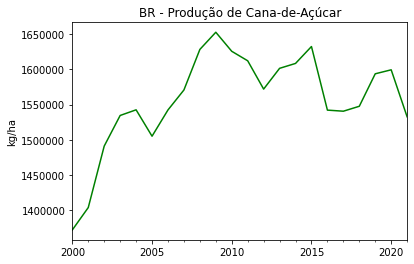

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de cana-de-açúcar no Brasil
filtro_commodity = df_prod_agraria['commodity'] == 'cana-de-acucar'
br_commodity = df_prod_agraria.loc[filtro_commodity]
tt_br = br_commodity.groupby(['ano'])['kg/ha'].sum()
plt.ticklabel_format(style='plain')
tt_br.plot(title = 'BR - Produção de Cana-de-Açúcar', color='green', ylabel='kg/ha', xlabel='')

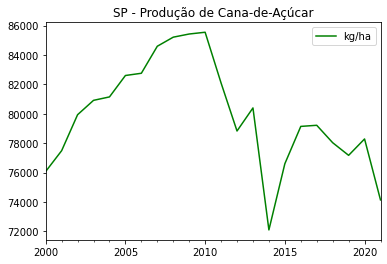

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de cana-de-açúcar no Estado de São Paulo
filtro_commodity = df_prod_agraria['commodity'] == 'cana-de-acucar'
filtro_uf = df_prod_agraria['uf'] == 'SP'
cana = df_prod_agraria.loc[filtro_commodity & filtro_uf]
cana.plot(x='ano', y='kg/ha', title = 'SP - Produção de Cana-de-Açúcar', color = 'green', xlabel='')

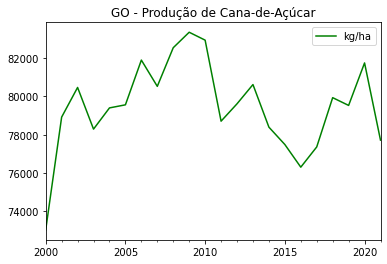

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de cana-de-açúcar no Estado de Goiás
filtro_commodity = df_prod_agraria['commodity'] == 'cana-de-acucar'
filtro_uf = df_prod_agraria['uf'] == 'GO'
cana = df_prod_agraria.loc[filtro_commodity & filtro_uf]
cana.plot(x='ano', y='kg/ha', title = 'GO - Produção de Cana-de-Açúcar', color = 'green', xlabel='')

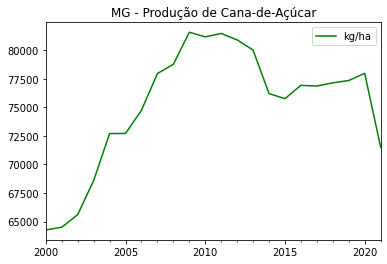

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de cana-de-açúcar no Estado de Minas Gerais
filtro_commodity = df_prod_agraria['commodity'] == 'cana-de-acucar'
filtro_uf = df_prod_agraria['uf'] == 'MG'
cana = df_prod_agraria.loc[filtro_commodity & filtro_uf]
cana.plot(x='ano', y='kg/ha', title = 'MG - Produção de Cana-de-Açúcar', color = 'green', xlabel='')

###### 🔺Café

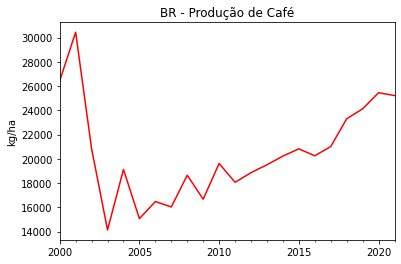

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de café no Brasil
filtro_commodity = df_prod_agraria['commodity'] == 'cafe'
br_commodity = df_prod_agraria.loc[filtro_commodity]
tt_br = br_commodity.groupby(['ano'])['kg/ha'].sum()
plt.ticklabel_format(style='plain')
tt_br.plot(title = 'BR - Produção de Café', color='red', ylabel='kg/ha', xlabel='')

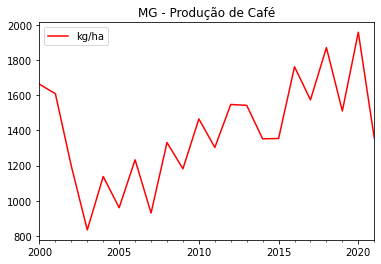

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de café no Estado de Minas Gerais
filtro_commodity = df_prod_agraria['commodity'] == 'cafe'
filtro_uf = df_prod_agraria['uf'] == 'MG'
cafe = df_prod_agraria.loc[filtro_commodity & filtro_uf]
cafe.plot(x='ano', y='kg/ha', title = 'MG - Produção de Café', color = 'red', xlabel='')

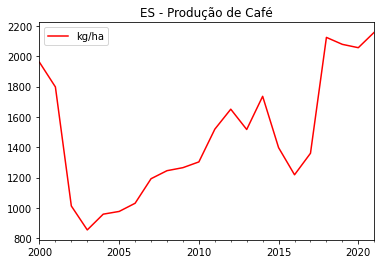

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de café no Estado do Espírito Santo
filtro_commodity = df_prod_agraria['commodity'] == 'cafe'
filtro_uf = df_prod_agraria['uf'] == 'ES'
cafe = df_prod_agraria.loc[filtro_commodity & filtro_uf]
cafe.plot(x='ano', y='kg/ha', title = 'ES - Produção de Café', color = 'red', xlabel='')

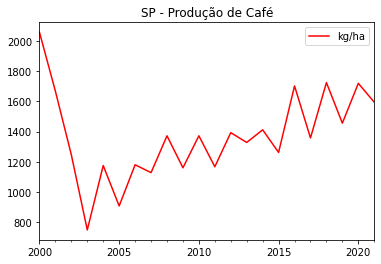

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de café no Estado de São Paulo
filtro_commodity = df_prod_agraria['commodity'] == 'cafe'
filtro_uf = df_prod_agraria['uf'] == 'SP'
cafe = df_prod_agraria.loc[filtro_commodity & filtro_uf]
cafe.plot(x='ano', y='kg/ha', title = 'SP - Produção de Café', color = 'red', xlabel='')

###### 🔺Milho

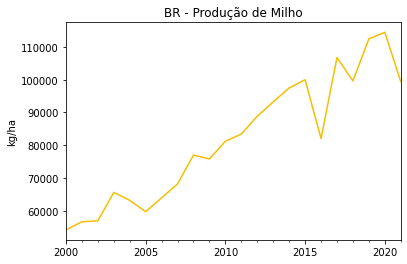

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de milho no Brasil
filtro_commodity = df_prod_agraria['commodity'] == 'milho'
br_commodity = df_prod_agraria.loc[filtro_commodity]
tt_br = br_commodity.groupby(['ano'])['kg/ha'].sum()
plt.ticklabel_format(style='plain')
tt_br.plot(title = 'BR - Produção de Milho', color='#F6BE00', ylabel='kg/ha', xlabel='')

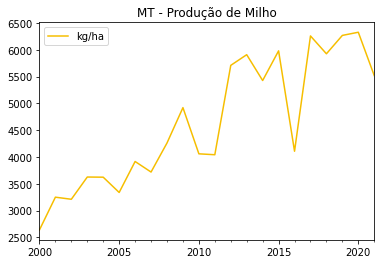

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de milho no Estado do Mato Grosso
filtro_commodity = df_prod_agraria['commodity'] == 'milho'
filtro_uf = df_prod_agraria['uf'] == 'MT'
milho = df_prod_agraria.loc[filtro_commodity & filtro_uf]
milho.plot(x='ano', y='kg/ha', title = 'MT - Produção de Milho', color = '#F6BE00', xlabel='')

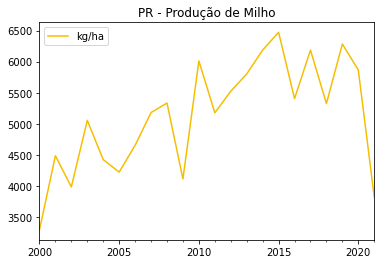

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de milho no Estado do Paraná
filtro_commodity = df_prod_agraria['commodity'] == 'milho'
filtro_uf = df_prod_agraria['uf'] == 'PR'
milho = df_prod_agraria.loc[filtro_commodity & filtro_uf]
milho.plot(x='ano', y='kg/ha', title = 'PR - Produção de Milho', color = '#F6BE00', xlabel='')

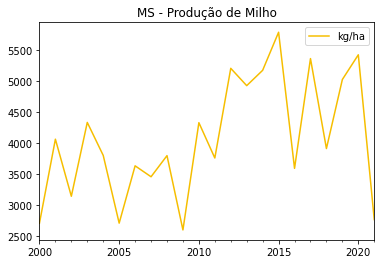

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de milho no Estado do Mato Grosso do Sul
filtro_commodity = df_prod_agraria['commodity'] == 'milho'
filtro_uf = df_prod_agraria['uf'] == 'MS'
milho = df_prod_agraria.loc[filtro_commodity & filtro_uf]
milho.plot(x='ano', y='kg/ha', title = 'MS - Produção de Milho', color = '#F6BE00', xlabel='')

###### 🔺Soja

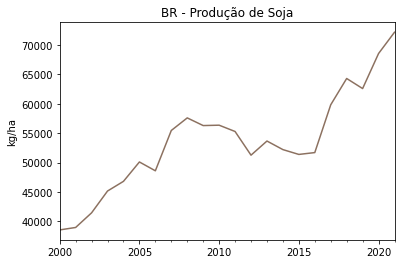

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de soja no Brasil
filtro_commodity = df_prod_agraria['commodity'] == 'soja'
br_commodity = df_prod_agraria.loc[filtro_commodity]
tt_br = br_commodity.groupby(['ano'])['kg/ha'].sum()
plt.ticklabel_format(style='plain')
tt_br.plot(title = 'BR - Produção de Soja', color='#8C7160', ylabel='kg/ha', xlabel='')

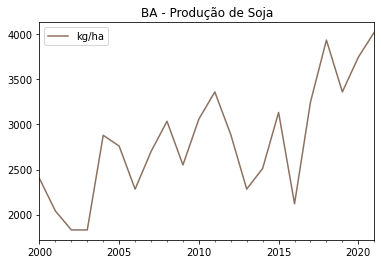

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de soja no Estado da Bahia
filtro_commodity = df_prod_agraria['commodity'] == 'soja'
filtro_uf = df_prod_agraria['uf'] == 'BA'
soja = df_prod_agraria.loc[filtro_commodity & filtro_uf]
soja.plot(x='ano', y='kg/ha', title = 'BA - Produção de Soja', color = '#8C7160', xlabel='')

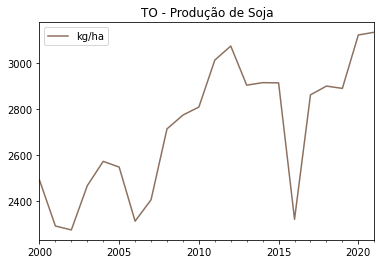

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de soja no Estado do Tocantins
filtro_commodity = df_prod_agraria['commodity'] == 'soja'
filtro_uf = df_prod_agraria['uf'] == 'TO'
soja = df_prod_agraria.loc[filtro_commodity & filtro_uf]
soja.plot(x='ano', y='kg/ha', title = 'TO - Produção de Soja', color = '#8C7160', xlabel='')

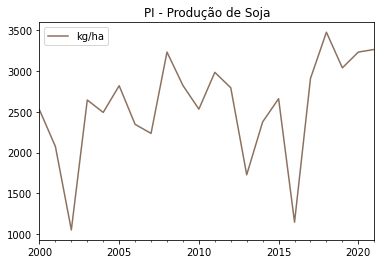

In [ ]:
# Verificando o rendimento, em kg/ha, da produção de soja no Estado do Piauí
filtro_commodity = df_prod_agraria['commodity'] == 'soja'
filtro_uf = df_prod_agraria['uf'] == 'PI'
soja = df_prod_agraria.loc[filtro_commodity & filtro_uf]
soja.plot(x='ano', y='kg/ha', title = 'PI - Produção de Soja', color = '#8C7160', xlabel='')

### 🔵Dataset 5 - Ocorrência de desastres naturais 

#### 🔺1- Tratamento com Pandas do dataset de ocorrências de desastres naturais

##### 🔺1.1 - Verificando valores

In [ ]:
df_des

,indicator,Tipo de desastre,Indicador__Desastres_Naturales,País__ESTANDAR,Años__ESTANDAR,value,unit,notes_ids,source_id
0,"Número de desastres, personas muertas y person...",Tormentas,Número de eventos,Brasil,1994,2,Número,NaN,742
1,"Número de desastres, personas muertas y person...",Tormentas,Número de eventos,Brasil,1997,1,Número,NaN,742
2,"Número de desastres, personas muertas y person...",Tormentas,Número de eventos,Brasil,2001,1,Número,NaN,742
3,"Número de desastres, personas muertas y person...",Tormentas,Número de eventos,Brasil,2004,1,Número,NaN,742
4,"Número de desastres, personas muertas y person...",Tormentas,Número de eventos,Brasil,2005,1,Número,NaN,742
...,...,...,...,...,...,...,...,...,...
169,"Número de desastres, personas muertas y person...",Incendios,Número de eventos,Brasil,1998,2,Número,NaN,742
170,"Número de desastres, personas muertas y person...",Incendios,Número de eventos,Brasil,1999,1,Número,NaN,742
171,"Número de desastres, personas muertas y person...",Incendios,Número de eventos,Brasil,2019,1,Número,NaN,742
172,"Número de desastres, personas muertas y person...",Incendios,Personas afectadas,Brasil,1998,12000,Número,NaN,742


In [ ]:
df_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   indicator                       174 non-null    object 
 1   Tipo de desastre                174 non-null    object 
 2   Indicador__Desastres_Naturales  174 non-null    object 
 3   País__ESTANDAR                  174 non-null    object 
 4   Años__ESTANDAR                  174 non-null    int64  
 5   value                           174 non-null    int64  
 6   unit                            174 non-null    object 
 7   notes_ids                       0 non-null      float64
 8   source_id                       174 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 12.4+ KB


In [ ]:
pd.unique(df_des.indicator)

# Possui um único valor, que pode ser obtivo pela coluna indicador_desastres - Dropar

array(['Número de desastres, personas muertas y personas directamente afectadas, por tipo de desastre'],
      dtype=object)

In [ ]:
pd.unique(df_des['Indicador__Desastres_Naturales']) 

# Traduzir valores

array(['Número de eventos', 'Personas afectadas', 'Perdidas Humanas'],
      dtype=object)

In [ ]:
pd.unique(df_des['Tipo de desastre']) 

# Traduzir 

array(['Tormentas', 'Temperaturas extremas', 'Inundaciones',
       'Desplazamiento de masa húmeda', 'Sequías', 'Incendios'],
      dtype=object)

In [ ]:
pd.unique(df_des['País__ESTANDAR']) 

# Dropar

array(['Brasil'], dtype=object)

In [ ]:
sorted(pd.unique(df_des['Años__ESTANDAR']), reverse=True)

# De 1990 a 2021  - Falta 1993, o que não vai gerar impacto pois usaremos os dados de 2000 para frente nas análises

[2021,
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995,
 1994,
 1992,
 1991,
 1990]

In [ ]:
pd.unique(df_des.value)

# Verificar valores muito altos 

array([       2,        1,     2000,      676,     3400,   150060,
            344,     1600,     2364,    13864,    11037,     1119,
              3,       13,        4,       12,        7,       32,
              5,        8,     2800,    17000,   147493,    33800,
           7000,    62200,    47500,    87000,    11046,     3500,
         205981,     5254,    41000,   116000,   206352,  1752391,
        1863648,   244938,  1215600,   299000,   247410,   618152,
         298510,    50500,   104140,     1250,    46778,    12661,
         571884,       24,       20,      107,      110,       15,
             90,       48,       85,       17,      255,       35,
             47,       69,      200,      164,      363,      978,
            119,       41,       11,       33,       14,      170,
            600,       60,     7105,        9,   143000,     1500,
           5000,      300,       30,      128,      171,       25,
             87, 10000000,  1000000,    62000,  4000000, 27000

In [ ]:
ind = df_des.loc[df_des.value > 15000]

pd.unique(ind['Indicador__Desastres_Naturales'])

# Valores altos são todos de pessoas afetadas, o que é crível 

array(['Personas afectadas'], dtype=object)

In [ ]:
pd.unique(df_des.unit)

# Dropar

array(['Número'], dtype=object)

In [ ]:
pd.unique(df_des.notes_ids)

# Dropar

array([nan])

In [ ]:
pd.unique(df_des.source_id)

# Manter?

array([742])

##### 🔺1.2 - Dropando colunas

Drop de colunas cujas informações eram redundantes ou pouco significativas para o escopo de nosssa análise

In [ ]:
df_des_back = df_des.copy()

In [ ]:
df_des.drop(['indicator','País__ESTANDAR','unit', 'notes_ids','source_id'], axis=1, inplace=True)

##### 🔺1.3 - Renomeando colunas

Renomeação de colunas, já com nomes em Portugês do Brasil

In [ ]:
df_des.rename({'Tipo de desastre':'tp_desastre', 'Indicador__Desastres_Naturales':'indicador','Años__ESTANDAR':'ano', 'value':'qtde'}, axis=1,inplace=True)

##### 🔺1.4 - Traduzindo valores das colunas

Tradução de valores das colunas de tipo string, do Espanhol para o Portugês do Brasil

In [ ]:
df_des.indicador.replace({'Personas afectadas':'Pessoas afetadas','Perdidas Humanas':'Perdas humanas'}, inplace=True)

In [ ]:
df_des.tp_desastre.replace({'Tormentas':'Tempestade','Inundaciones':'Inundação',
       'Desplazamiento de masa húmeda':'Deslizamento de terra', 'Sequías':'Seca', 'Incendios':'Incêndio'}, inplace=True)

##### 🔺1.5 - Realizando cast de colunas 

Realização de cast da coluna 'ano' para datetime

In [ ]:
df_des.ano = pd.to_datetime(df_des.ano, format='%Y')

In [ ]:
pd.unique(df_des.ano)

array(['1994-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01

In [ ]:
df_des.dtypes

tp_desastre            object
indicador              object
ano            datetime64[ns]
qtde                    int64
dtype: object

In [ ]:
df_des

,tp_desastre,indicador,ano,qtde
0,Tempestade,Número de eventos,1994-01-01,2
1,Tempestade,Número de eventos,1997-01-01,1
2,Tempestade,Número de eventos,2001-01-01,1
3,Tempestade,Número de eventos,2004-01-01,1
4,Tempestade,Número de eventos,2005-01-01,1
...,...,...,...,...
169,Incêndio,Número de eventos,1998-01-01,2
170,Incêndio,Número de eventos,1999-01-01,1
171,Incêndio,Número de eventos,2019-01-01,1
172,Incêndio,Pessoas afetadas,1998-01-01,12000


### 🔵Dataset 6 - Impacto econômico de desastres naturais

#### 🔺1- Tratamento com Pandas do dataset de impacto econômico dos desastres naturais 

#### 🔺1.1 - Verificando valores 

In [ ]:
df_custo

,indicator,País__ESTANDAR,Tipo de desastre,Años__ESTANDAR,value,unit,notes_ids,source_id
0,"Costo económico de los desastres, por tipo de ...",Brasil,Geofísicos,1986,5000,Miles de dólares,NaN,742.0
1,"Costo económico de los desastres, por tipo de ...",Brasil,Geofísicos,2007,0,Miles de dólares,NaN,742.0
2,"Costo económico de los desastres, por tipo de ...",Brasil,Relacionados con Cambio Climático,1970,46100,Miles de dólares,NaN,742.0
3,"Costo económico de los desastres, por tipo de ...",Brasil,Relacionados con Cambio Climático,1971,5200,Miles de dólares,NaN,742.0
4,"Costo económico de los desastres, por tipo de ...",Brasil,Relacionados con Cambio Climático,1973,16000,Miles de dólares,NaN,742.0
5,"Costo económico de los desastres, por tipo de ...",Brasil,Relacionados con Cambio Climático,1974,121000,Miles de dólares,NaN,742.0
6,"Costo económico de los desastres, por tipo de ...",Brasil,Relacionados con Cambio Climático,1975,854900,Miles de dólares,NaN,742.0
7,"Costo económico de los desastres, por tipo de ...",Brasil,Relacionados con Cambio Climático,1977,0,Miles de dólares,NaN,742.0
8,"Costo económico de los desastres, por tipo de ...",Brasil,Relacionados con Cambio Climático,1978,2300000,Miles de dólares,NaN,742.0
9,"Costo económico de los desastres, por tipo de ...",Brasil,Relacionados con Cambio Climático,1979,0,Miles de dólares,NaN,742.0


In [ ]:
df_custo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indicator         52 non-null     object 
 1   País__ESTANDAR    52 non-null     object 
 2   Tipo de desastre  52 non-null     object 
 3   Años__ESTANDAR    52 non-null     int64  
 4   value             52 non-null     int64  
 5   unit              52 non-null     object 
 6   notes_ids         0 non-null      float64
 7   source_id         48 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB


In [ ]:
pd.unique(df_custo.indicator)

# Possui um único valor, que não acrescenta informação ao df - Dropar

array(['Costo económico de los desastres, por tipo de desastre'],
      dtype=object)

In [ ]:
pd.unique(df_custo['País__ESTANDAR']) 

# Dropar

array(['Brasil'], dtype=object)

In [ ]:
pd.unique(df_custo['Tipo de desastre']) 

# Traduzir 

array(['Geofísicos', 'Relacionados con Cambio Climático'], dtype=object)

In [ ]:
sorted(pd.unique(df_custo['Años__ESTANDAR']))

# De 1970 a 2022  - Faltam  1972, 1976 e 1993, o que não vai gerar impacto pois usaremos os dados de 2000 para frente nas análises

[1970,
 1971,
 1973,
 1974,
 1975,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [ ]:
pd.unique(df_custo.value)

# Verificar valores zerados (houve ocorrência de desastre nesses anos?)

array([   5000,       0,   46100,    5200,   16000,  121000,  854900,
       2300000,  350000, 2000000,  851000,   62000, 1030000,    2000,
         25800,  566000,    3000,  159000,   75000,   45000,   11000,
        303000, 2000370,  125000, 1110000,  745000,  802000, 1002000,
       1631000,  635500, 5200000,    4000,  200000,  100000,   53000,
       3600000, 3543000,  812000])

In [ ]:
pd.unique(df_custo.unit)

# Dropar

array(['Miles de dólares'], dtype=object)

In [ ]:
pd.unique(df_custo.notes_ids)

# Dropar

array([nan])

In [ ]:
pd.unique(df_custo.source_id)

# Manter?

array([742.,  nan])

#### 🔺1.2 - Dropando colunas

In [ ]:
df_custo_back = df_custo.copy()

In [ ]:
df_custo.drop(['indicator','País__ESTANDAR','unit', 'notes_ids','source_id'], axis=1, inplace=True)

In [ ]:
df_custo.columns

Index(['Tipo de desastre', 'Años__ESTANDAR', 'value'], dtype='object')

#### 🔺1.3 - Renomeando colunas

Renomeação de colunas, já com nomes em Portugês do Brasil

In [ ]:
df_custo.rename({'Tipo de desastre':'tp_desastre','Años__ESTANDAR':'ano', 'value':'custo'}, axis=1,inplace=True)

#### 🔺1.4 - Traduzindo valores das colunas

Tradução de valores das colunas de tipo string, do Espanhol para o Portugês do Brasil

In [ ]:
pd.unique(df_custo.tp_desastre)

array(['Geofísicos', 'Relacionados con Cambio Climático'], dtype=object)

In [ ]:
df_custo.tp_desastre.replace({'Relacionados con Cambio Climático':'Relacionados com mudanças climáticas'}, inplace=True)

#### 🔺1.5 - Realizando cast de colunas

Realização de cast da coluna 'ano' para datetime

In [ ]:
df_custo.ano = pd.to_datetime(df_custo.ano, format='%Y')

In [ ]:
df_custo.dtypes

tp_desastre            object
ano            datetime64[ns]
custo                   int64
dtype: object

#### 🔺1.6 - Dropando linhas

Dropagem de linhas com valores zerados

In [ ]:
df_custo = df_custo.loc[df_custo.custo != 0]

In [ ]:
pd.unique(df_custo.custo)

array([   5000,   46100,    5200,   16000,  121000,  854900, 2300000,
        350000, 2000000,  851000,   62000, 1030000,    2000,   25800,
        566000,    3000,  159000,   75000,   45000,   11000,  303000,
       2000370,  125000, 1110000,  745000,  802000, 1002000, 1631000,
        635500, 5200000,    4000,  200000,  100000,   53000, 3600000,
       3543000,  812000])

## Envio dos datasets tratados 📂

### 🔵CloudStorage

In [ ]:
serviceAccount = '/content/projeto-final-ed7-3e8bedf4ed71.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

client = storage.Client()
bucket = client.get_bucket('equipe3-storage')

#### 🔺Dataset 1 - Clima 

In [ ]:
bucket.blob('Datasets_tratados/dataset1_clima/DF_clima_t.csv').upload_from_string(df_cli.to_csv(sep='|', encoding='utf-8',index=False), 'DF_clima_t.csv')

#### 🔺Dataset 2 - Emissão de CO2

In [ ]:
bucket.blob('Datasets_tratados/dataset2_emissao_co2/DF_emissao_co2_t.csv').upload_from_string(df2.to_csv(sep='|', encoding='utf-8',index=False), 'DF_emissao_co2_t.csv')

#### 🔺Dataset 3 - Queimadas

In [ ]:
bucket.blob('Datasets_tratados/dataset8_queimadas/DF_queimadas_t.csv').upload_from_string(df_queimadas.to_csv(sep='|', encoding='utf-8',index=False), 'DF_queimadas_t.csv')

#### 🔺Dataset 4 - Produção Agrária

In [ ]:
bucket.blob('Datasets_tratados/dataset4_producao_agraria/DF_prod_agraria_t.csv').upload_from_string(df_prod_agraria.to_csv(sep='|', encoding='utf-8',index=False), 'DF_prod_agraria_t.csv')

#### 🔺Dataset 5 - Ocorrência de desastres naturais

In [ ]:
bucket.blob('Datasets_tratados/dataset6_desastres_naturais/DF_ocorrencias_desastres_t.csv').upload_from_string(df_des.to_csv(sep='|', encoding='utf-8',index=False), 'DF_ocorrencias_desastres_t.csv')

#### 🔺Dataset 6 - Impacto econômico de desastres naturais

In [ ]:
bucket.blob('Datasets_tratados/dataset6_desastres_naturais/DF_custo_desastres_t.csv').upload_from_string(df_custo.to_csv(sep='|', encoding='utf-8',index=False), 'DF_custo_desastres_t.csv')

### 🔵MongoDB

#### 🔺Conector das 3 contas do mongo necessárias para o envio

In [ ]:
# conta mongo projeto
uri = 'mongodb+srv://cluster.hwgpztt.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority'
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/X509-cert-3434656961601362191-conta-projeto.pem')

In [ ]:
# segunda conta
uri = 'mongodb+srv://equipe3-clima.uomtwl9.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority'
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/X509-cert-6819354964089536153-conta-mayara.pem')

In [ ]:
# terceira conta
uri = 'mongodb+srv://cluster0.erhetdo.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority'
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/X509-cert-9069893783237655800-conta-fernanda.pem')

#### 🔺Criação do database e coleções

In [ ]:
db = client['equipe3-clima-tratados']
colecao1 = db['dataset_clima']
colecao2 = db['dataset_co2']
colecao3 = db['dataset_queimadas']
colecao4 = db['dataset_prod_agraria']
colecao5 = db['dataset_desastres_ocorrencias']
colecao6 = db['dataset_desastres_custo']

#### 🔺Dataset 1 - Clima 

O dataset em questão foi enviado para três contas diferentes pois seu tamanho excedia a capacidade de armazenamento da cluster utilizada no MongoDB. Além disso foi dividido em partes menores a cada 50.000 linhas para que o envio pudesse ser efetivado

In [ ]:
# Criando uma lista para armazenar os slices do dataset
lista_slices = []

In [ ]:
# Criado um laço de repetição para gerar os slices e adicioná-los à lista
i = 0
d=1
while i < 2700000:
  x = 'dataset_clima_parte'+str(d)+' = df_cli['+str(i)+':'+str(i+50000)+']'
  i += 50000
  d += 1
  lista_slices.append(x)

In [ ]:
# Conferindo a lista de slices
lista_slices

In [ ]:
# Criando uma lista para adicionar os comandos de envio para o MongoDB
lista_partes = []

In [ ]:
# Criando um laço de repetição para gerar os códigos de transformaçao em dicionario e de envio de cada slice
i = 1
while i < 55:
  x = "dataset_clima_parte"+str(i)+"_dict = dataset_clima_parte"+str(i)+".to_dict('records')"
  y = "colecao1.insert_many(dataset_clima_parte"+str(i)+"_dict)"
  i += 1
  lista_partes.append(x)
  lista_partes.append(y)

In [ ]:
# Conferindo a lista de códigos gerados
lista_partes

In [ ]:
dataset_clima_parte1 = df_cli[:50000]
dataset_clima_parte2 = df_cli[50000:100000]
dataset_clima_parte3 = df_cli[100000:150000]
dataset_clima_parte4 = df_cli[150000:200000]
dataset_clima_parte5 = df_cli[200000:250000]
dataset_clima_parte6 = df_cli[250000:300000]
dataset_clima_parte7 = df_cli[300000:350000]
dataset_clima_parte8 = df_cli[350000:400000]
dataset_clima_parte9 = df_cli[400000:450000]
dataset_clima_parte10 = df_cli[450000:500000]
dataset_clima_parte11 = df_cli[500000:550000]
dataset_clima_parte12 = df_cli[550000:600000]
dataset_clima_parte13 = df_cli[600000:650000]
dataset_clima_parte14 = df_cli[650000:700000]
dataset_clima_parte15 = df_cli[700000:750000]
dataset_clima_parte16 = df_cli[750000:800000]
dataset_clima_parte17 = df_cli[800000:850000]
dataset_clima_parte18 = df_cli[850000:900000]
dataset_clima_parte19 = df_cli[900000:950000]
dataset_clima_parte20 = df_cli[950000:1000000]
dataset_clima_parte21 = df_cli[1000000:1050000]
dataset_clima_parte22 = df_cli[1050000:1100000]
dataset_clima_parte23 = df_cli[1100000:1150000]
dataset_clima_parte24 = df_cli[1150000:1200000]
dataset_clima_parte25 = df_cli[1200000:1250000]
dataset_clima_parte26 = df_cli[1250000:1300000]
dataset_clima_parte27 = df_cli[1300000:1350000]
dataset_clima_parte28 = df_cli[1350000:1400000]
dataset_clima_parte29 = df_cli[1400000:1450000]
dataset_clima_parte30 = df_cli[1450000:1500000]
dataset_clima_parte31 = df_cli[1500000:1550000]
dataset_clima_parte32 = df_cli[1550000:1600000]
dataset_clima_parte33 = df_cli[1600000:1650000]
dataset_clima_parte34 = df_cli[1650000:1700000]
dataset_clima_parte35 = df_cli[1700000:1750000]
dataset_clima_parte36 = df_cli[1750000:1800000]
dataset_clima_parte37 = df_cli[1800000:1850000]
dataset_clima_parte38 = df_cli[1850000:1900000]
dataset_clima_parte39 = df_cli[1900000:1950000]
dataset_clima_parte40 = df_cli[1950000:2000000]
dataset_clima_parte41 = df_cli[2000000:2050000]
dataset_clima_parte42 = df_cli[2050000:2100000]
dataset_clima_parte43 = df_cli[2100000:2150000]
dataset_clima_parte44 = df_cli[2150000:2200000]
dataset_clima_parte45 = df_cli[2200000:2250000]
dataset_clima_parte46 = df_cli[2250000:2300000]
dataset_clima_parte47 = df_cli[2300000:2350000]
dataset_clima_parte48 = df_cli[2350000:2400000]
dataset_clima_parte49 = df_cli[2400000:2450000]
dataset_clima_parte50 = df_cli[2450000:2500000]
dataset_clima_parte51 = df_cli[2500000:2550000]
dataset_clima_parte52 = df_cli[2550000:2600000]
dataset_clima_parte53 = df_cli[2600000:2650000]
dataset_clima_parte54 = df_cli[2650000:]

In [ ]:
# envio para primeira conta
dataset_clima_parte1_dict = dataset_clima_parte1.to_dict('records')
colecao1.insert_many(dataset_clima_parte1_dict)
dataset_clima_parte2_dict = dataset_clima_parte2.to_dict('records')
colecao1.insert_many(dataset_clima_parte2_dict)
dataset_clima_parte3_dict = dataset_clima_parte3.to_dict('records')
colecao1.insert_many(dataset_clima_parte3_dict)
dataset_clima_parte4_dict = dataset_clima_parte4.to_dict('records')
colecao1.insert_many(dataset_clima_parte4_dict)
dataset_clima_parte5_dict = dataset_clima_parte5.to_dict('records')
colecao1.insert_many(dataset_clima_parte5_dict)
dataset_clima_parte6_dict = dataset_clima_parte6.to_dict('records')
colecao1.insert_many(dataset_clima_parte6_dict)
dataset_clima_parte7_dict = dataset_clima_parte7.to_dict('records')
colecao1.insert_many(dataset_clima_parte7_dict)
dataset_clima_parte8_dict = dataset_clima_parte8.to_dict('records')
colecao1.insert_many(dataset_clima_parte8_dict)
dataset_clima_parte9_dict = dataset_clima_parte9.to_dict('records')
colecao1.insert_many(dataset_clima_parte9_dict)
dataset_clima_parte10_dict = dataset_clima_parte10.to_dict('records')
colecao1.insert_many(dataset_clima_parte10_dict)
dataset_clima_parte11_dict = dataset_clima_parte11.to_dict('records')
colecao1.insert_many(dataset_clima_parte11_dict)
dataset_clima_parte12_dict = dataset_clima_parte12.to_dict('records')
colecao1.insert_many(dataset_clima_parte12_dict)
dataset_clima_parte13_dict = dataset_clima_parte13.to_dict('records')
colecao1.insert_many(dataset_clima_parte13_dict)
dataset_clima_parte14_dict = dataset_clima_parte14.to_dict('records')
colecao1.insert_many(dataset_clima_parte14_dict)
dataset_clima_parte15_dict = dataset_clima_parte15.to_dict('records')
colecao1.insert_many(dataset_clima_parte15_dict)
dataset_clima_parte16_dict = dataset_clima_parte16.to_dict('records')
colecao1.insert_many(dataset_clima_parte16_dict)
dataset_clima_parte17_dict = dataset_clima_parte17.to_dict('records')
colecao1.insert_many(dataset_clima_parte17_dict)
dataset_clima_parte18_dict = dataset_clima_parte18.to_dict('records')
colecao1.insert_many(dataset_clima_parte18_dict)
dataset_clima_parte19_dict = dataset_clima_parte19.to_dict('records')
colecao1.insert_many(dataset_clima_parte19_dict)
dataset_clima_parte20_dict = dataset_clima_parte20.to_dict('records')
colecao1.insert_many(dataset_clima_parte20_dict)
dataset_clima_parte21_dict = dataset_clima_parte21.to_dict('records')
colecao1.insert_many(dataset_clima_parte21_dict)

In [ ]:
#envio para segunda conta
dataset_clima_parte22_dict = dataset_clima_parte22.to_dict('records')
colecao1.insert_many(dataset_clima_parte22_dict)
dataset_clima_parte23_dict = dataset_clima_parte23.to_dict('records')
colecao1.insert_many(dataset_clima_parte23_dict)
dataset_clima_parte24_dict = dataset_clima_parte24.to_dict('records')
colecao1.insert_many(dataset_clima_parte24_dict)
dataset_clima_parte25_dict = dataset_clima_parte25.to_dict('records')
colecao1.insert_many(dataset_clima_parte25_dict)
dataset_clima_parte26_dict = dataset_clima_parte26.to_dict('records')
colecao1.insert_many(dataset_clima_parte26_dict)
dataset_clima_parte27_dict = dataset_clima_parte27.to_dict('records')
colecao1.insert_many(dataset_clima_parte27_dict)
dataset_clima_parte28_dict = dataset_clima_parte28.to_dict('records')
colecao1.insert_many(dataset_clima_parte28_dict)
dataset_clima_parte29_dict = dataset_clima_parte29.to_dict('records')
colecao1.insert_many(dataset_clima_parte29_dict)
dataset_clima_parte30_dict = dataset_clima_parte30.to_dict('records')
colecao1.insert_many(dataset_clima_parte30_dict)
dataset_clima_parte31_dict = dataset_clima_parte31.to_dict('records')
colecao1.insert_many(dataset_clima_parte31_dict)
dataset_clima_parte32_dict = dataset_clima_parte32.to_dict('records')
colecao1.insert_many(dataset_clima_parte32_dict)
dataset_clima_parte33_dict = dataset_clima_parte33.to_dict('records')
colecao1.insert_many(dataset_clima_parte33_dict)
dataset_clima_parte34_dict = dataset_clima_parte34.to_dict('records')
colecao1.insert_many(dataset_clima_parte34_dict)
dataset_clima_parte35_dict = dataset_clima_parte35.to_dict('records')
colecao1.insert_many(dataset_clima_parte35_dict)
dataset_clima_parte36_dict = dataset_clima_parte36.to_dict('records')
colecao1.insert_many(dataset_clima_parte36_dict)
dataset_clima_parte37_dict = dataset_clima_parte37.to_dict('records')
colecao1.insert_many(dataset_clima_parte37_dict)
dataset_clima_parte38_dict = dataset_clima_parte38.to_dict('records')
colecao1.insert_many(dataset_clima_parte38_dict)
dataset_clima_parte39_dict = dataset_clima_parte39.to_dict('records')
colecao1.insert_many(dataset_clima_parte39_dict)
dataset_clima_parte40_dict = dataset_clima_parte40.to_dict('records')
colecao1.insert_many(dataset_clima_parte40_dict)
dataset_clima_parte41_dict = dataset_clima_parte41.to_dict('records')
colecao1.insert_many(dataset_clima_parte41_dict)
dataset_clima_parte42_dict = dataset_clima_parte42.to_dict('records')
colecao1.insert_many(dataset_clima_parte42_dict)

In [ ]:
#envio para terceira conta
dataset_clima_parte43_dict = dataset_clima_parte43.to_dict('records')
colecao1.insert_many(dataset_clima_parte43_dict)
dataset_clima_parte44_dict = dataset_clima_parte44.to_dict('records')
colecao1.insert_many(dataset_clima_parte44_dict)
dataset_clima_parte45_dict = dataset_clima_parte45.to_dict('records')
colecao1.insert_many(dataset_clima_parte45_dict)
dataset_clima_parte46_dict = dataset_clima_parte46.to_dict('records')
colecao1.insert_many(dataset_clima_parte46_dict)
dataset_clima_parte47_dict = dataset_clima_parte47.to_dict('records')
colecao1.insert_many(dataset_clima_parte47_dict)
dataset_clima_parte48_dict = dataset_clima_parte48.to_dict('records')
colecao1.insert_many(dataset_clima_parte48_dict)
dataset_clima_parte49_dict = dataset_clima_parte49.to_dict('records')
colecao1.insert_many(dataset_clima_parte49_dict)
dataset_clima_parte50_dict = dataset_clima_parte50.to_dict('records')
colecao1.insert_many(dataset_clima_parte50_dict)
dataset_clima_parte51_dict = dataset_clima_parte51.to_dict('records')
colecao1.insert_many(dataset_clima_parte51_dict)
dataset_clima_parte52_dict = dataset_clima_parte52.to_dict('records')
colecao1.insert_many(dataset_clima_parte52_dict)
dataset_clima_parte53_dict = dataset_clima_parte53.to_dict('records')
colecao1.insert_many(dataset_clima_parte53_dict)
dataset_clima_parte54_dict = dataset_clima_parte54.to_dict('records')
colecao1.insert_many(dataset_clima_parte54_dict)

#### 🔺Dataset 2 - Emissão de CO2

In [ ]:
dataset_co2 = df2

In [ ]:
dataset_co2_dict = dataset_co2.to_dict('records')
colecao2.insert_many(dataset_co2_dict)

#### 🔺Dataset 3 - Queimadas

In [ ]:
dataset_queimadas = df_queimadas

In [ ]:
dataset_queimadas_dict = dataset_queimadas.to_dict('records')
colecao3.insert_many(dataset_queimadas_dict)

#### 🔺Dataset 4 - Produção Agrária

In [ ]:
dataset_prod_agraria = df_prod_agraria

In [ ]:
dataset_prod_agraria_dict = dataset_prod_agraria.to_dict('records')
colecao4.insert_many(dataset_prod_agraria_dict)

#### 🔺Dataset 5 - Ocorrência de desastres naturais

In [ ]:
dataset_desastres_ocorrencias = df_des

In [ ]:
dataset_desastres_ocorrencias_dict = dataset_desastres_ocorrencias.to_dict('records')
colecao5.insert_many(dataset_desastres_ocorrencias_dict)

#### 🔺Dataset 6 - Impacto econômico de desastres naturais

In [ ]:
dataset_desastres_custo = df_custo

In [ ]:
dataset_desastres_custo_dict = dataset_desastres_custo.to_dict('records')
colecao6.insert_many(dataset_desastres_custo_dict)

#### 🔺Verificação da contagem de documentos nas coleções

In [ ]:
doc_count1 = colecao1.count_documents({})
print(doc_count1)

In [ ]:
doc_count2 = colecao2.count_documents({})
print(doc_count2)
doc_count3 = colecao3.count_documents({})
print(doc_count3)
doc_count4 = colecao4.count_documents({})
print(doc_count4)
doc_count5 = colecao5.count_documents({})
print(doc_count5)
doc_count6 = colecao6.count_documents({})
print(doc_count6)